In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#load iris.csv file:
%pwd

'/home/samoht25/uclax-data-science/01-iris-03-why-estimate-f/Review'

In [3]:
%cd /home/samoht25/uclax-data-science/01-iris-03-why-estimate-f

/home/samoht25/uclax-data-science/01-iris-03-why-estimate-f


In [4]:
%ls

04-why-estimate-f-prediction.ipynb  06-multicollinearity.ipynb         data/
05-the-train-test-split.ipynb       07-why-estimate-f-inference.ipynb  Review/


In [5]:
iris_df = pd.read_csv("data/iris.csv", index_col=0)

In [6]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_df.sample(4)

,sepal_length,sepal_width,petal_length,petal_width
65,6.7,3.1,4.4,1.4
107,7.3,2.9,6.3,1.8
8,4.4,2.9,1.4,0.2
2,4.7,3.2,1.3,0.2


<Figure size 1440x720 with 0 Axes>

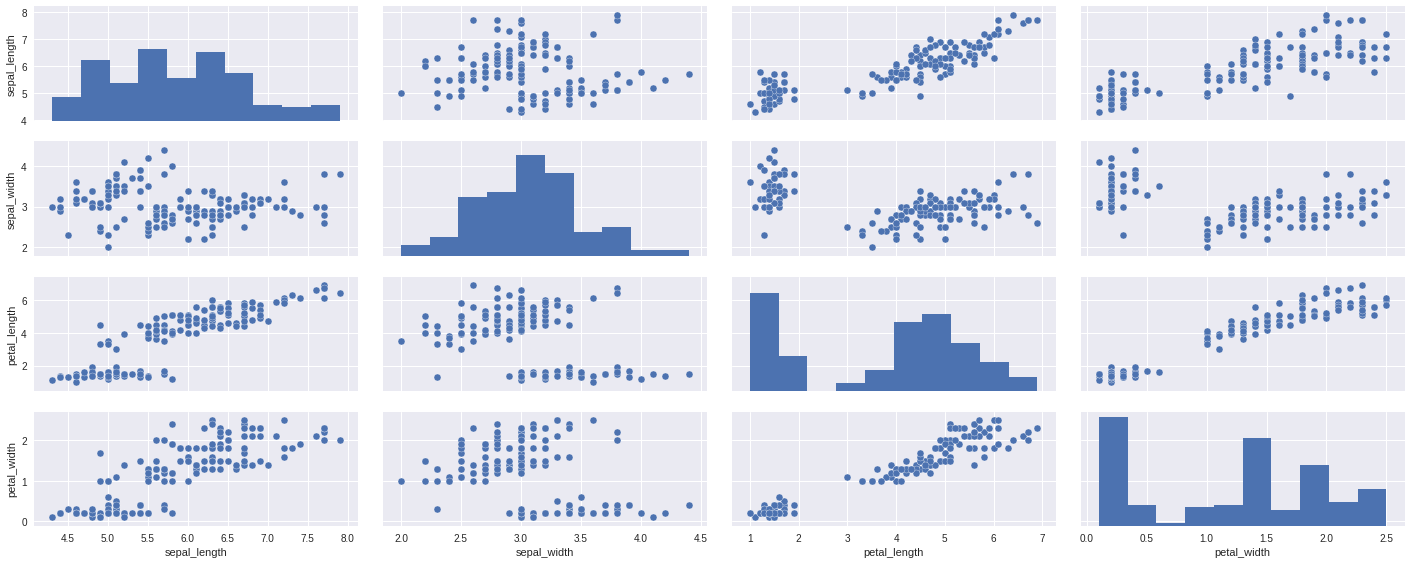

In [9]:
#use pair plot to find the best feature and target.
plt.figure(1, (20,10))
sns.pairplot(iris_df, size=2, aspect = 2.5)

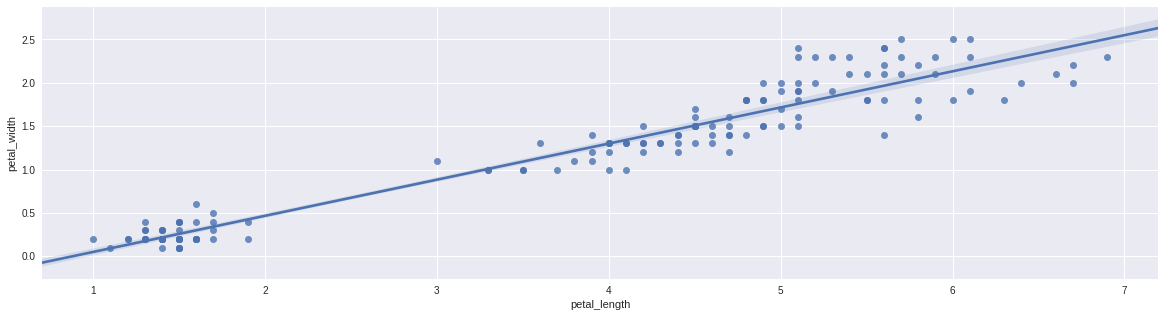

In [10]:
#looking at the map we can see petal_length and petal_width have the best positive correlation. 
plt.figure(1, figsize = (20,5))
sns.regplot("petal_length", "petal_width", data=iris_df)

In [11]:
#define your target and features. Petal_width (target, y-axis) ~ Petal_length (features, x-axis)
from patsy import dmatrices

In [12]:
target, features = dmatrices("petal_width ~ petal_length", iris_df)

In [13]:
features[:5,]

array([[ 1. ,  1.4],
       [ 1. ,  1.4],
       [ 1. ,  1.3],
       [ 1. ,  1.5],
       [ 1. ,  1.4]])

In [14]:
#Use Linear Regression model
from sklearn.linear_model import LinearRegression

In [15]:
linear_regression_model = LinearRegression(fit_intercept=False)
linear_regression_model.fit(features,target)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [16]:
predictions = linear_regression_model.predict(features)

In [17]:
predictions.shape

(150, 1)

In [18]:
linear_regression_model.coef_#extra things to know..

array([[-0.36651405,  0.41641913]])

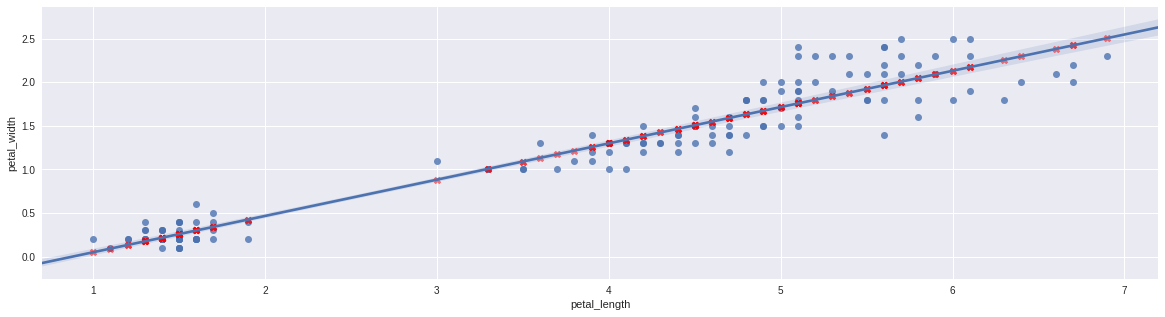

In [19]:
plt.figure(1,(20,5))
sns.regplot("petal_length", "petal_width", iris_df)

plt.scatter(iris_df.petal_length, predictions, marker="X", color="red", alpha=0.5)

In [20]:
#Now let's train and test our model.
from sklearn.model_selection import train_test_split

In [21]:
target, features = dmatrices("petal_width ~ petal_length", iris_df)

In [22]:
(features_train, features_test, target_train, target_test) = train_test_split(features, target, random_state=42)

In [23]:
linear_regression_model = LinearRegression(fit_intercept=False)

In [24]:
linear_regression_model.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [25]:
petal_width_prediction_var_1 = linear_regression_model.predict(features_test)

In [26]:
features_test[0:10]

array([[ 1. ,  4.7],
       [ 1. ,  1.7],
       [ 1. ,  6.9],
       [ 1. ,  4.5],
       [ 1. ,  4.8],
       [ 1. ,  1.5],
       [ 1. ,  3.6],
       [ 1. ,  5.1],
       [ 1. ,  4.5],
       [ 1. ,  3.9]])

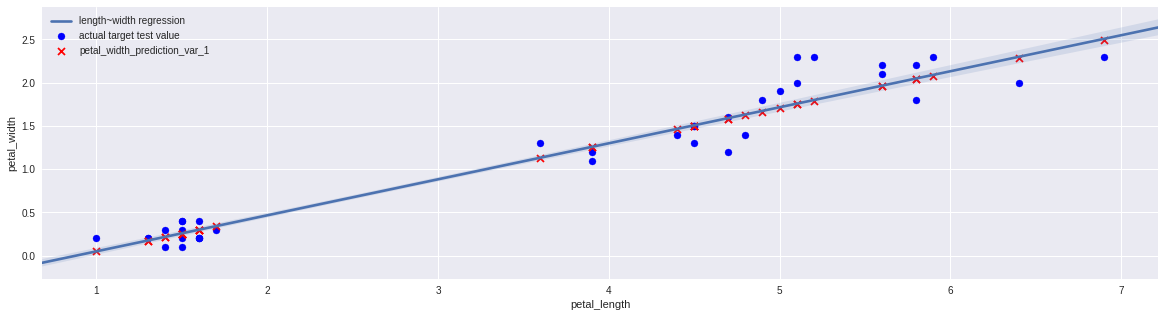

In [27]:
plt.figure(1, figsize=(20,5))

plt.scatter(features_test[:,1], target_test, marker="o", color="blue", label = "actual target test value")
plt.scatter(features_test[:,1], petal_width_prediction_var_1, marker="x", color="red", label = "petal_width_prediction_var_1")

sns.regplot("petal_length", "petal_width", scatter=False, label="length~width regression", data=iris_df) # put this on the bottom as it is used to turn off scatter.
plt.legend()

In [28]:
#added features "petal_width ~ petal_length + sepal_length", we will do train and test on this model now.
from patsy import dmatrices
target, features = dmatrices("petal_width ~ petal_length + sepal_length", iris_df)

In [29]:
from sklearn.model_selection import train_test_split
(features_train, features_test, target_train, target_test) = train_test_split(features, target, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression(fit_intercept=False)#turn off intercept or B0

In [31]:
linear_regression_model.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [32]:
petal_width_prediction_var_2 = linear_regression_model.predict(features_test)

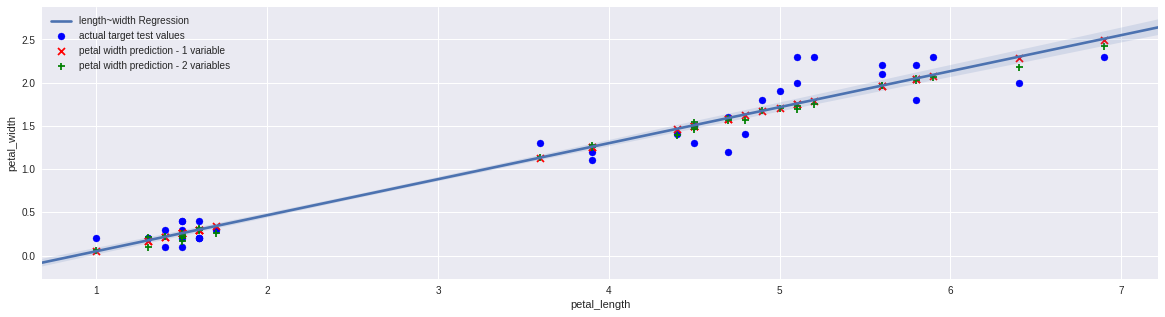

In [33]:
plt.figure(1, figsize=(20,5))

plt.scatter(features_test[:,1], target_test, marker = "o", color="blue", label="actual target test values")
plt.scatter(features_test[:,1], petal_width_prediction_var_1, marker="x", color="red", label = "petal width prediction - 1 variable")
plt.scatter(features_test[:,1], petal_width_prediction_var_2, marker="+", color="green", label = "petal width prediction - 2 variables")

sns.regplot("petal_length", "petal_width", data=iris_df, scatter=False, label = "length~width Regression")
plt.legend()

In [34]:
##added features "petal_width ~ petal_length + sepal_length + sepal_width", we will do train and test on this model now.
from patsy import dmatrices
target, features = dmatrices("petal_width ~ petal_length + sepal_length + sepal_width", iris_df)

In [35]:
from sklearn.model_selection import train_test_split
(features_train, features_test, target_train, target_test) = train_test_split(features, target, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression(fit_intercept=False)
linear_regression_model.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [37]:
petal_width_prediction_var_3 = linear_regression_model.predict(features_test)

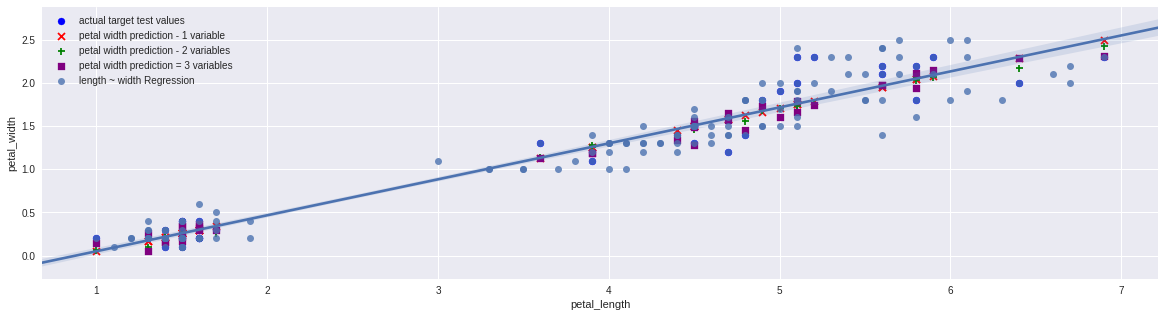

In [38]:
plt.figure(1, figsize=(20,5))

plt.scatter(features_test[:,1], target_test, marker = "o", color="blue", label="actual target test values")
plt.scatter(features_test[:,1], petal_width_prediction_var_1, marker="x", color="red", label = "petal width prediction - 1 variable")
plt.scatter(features_test[:,1], petal_width_prediction_var_2, marker="+", color="green", label = "petal width prediction - 2 variables")
plt.scatter(features_test[:,1], petal_width_prediction_var_3, marker = "s", color="purple", label = "petal width prediction = 3 variables")

sns.regplot("petal_length", "petal_width", data=iris_df, scatter="False", label="length ~ width Regression")
plt.legend()

In [39]:
#residual plots
x_values = features_test[:,1]
y_values = target_test
y_hat_1_values = petal_width_prediction_var_1
y_hat_2_values = petal_width_prediction_var_2
y_hat_3_values = petal_width_prediction_var_3

y_hat = (y_hat_1_values, y_hat_2_values, y_hat_3_values)
points = list(zip(x_values, y_values, y_hat_1_values, y_hat_2_values, y_hat_3_values))

In [40]:
x_values

array([ 4.7,  1.7,  6.9,  4.5,  4.8,  1.5,  3.6,  5.1,  4.5,  3.9,  5.1,
        1.4,  1.3,  1.5,  1.5,  4.7,  5.8,  3.9,  4.5,  5.6,  1.6,  4.9,
        1.6,  5.6,  6.4,  5.2,  5.8,  5.9,  1.4,  1.6,  1. ,  1.5,  4.4,
        1.6,  1.3,  5. ,  4.5,  1.5])

In [41]:
points[0:2]

[(4.7000000000000002,
  array([ 1.2]),
  array([ 1.58336589]),
  array([ 1.59363372]),
  array([ 1.56856217])),
 (1.7,
  array([ 0.3]),
  array([ 0.33901214]),
  array([ 0.25874381]),
  array([ 0.3002524]))]

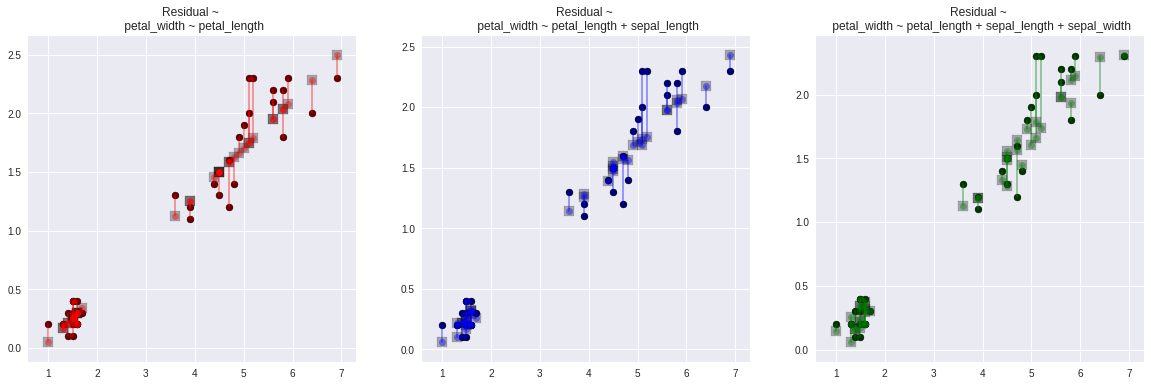

In [42]:
fig, ax = plt.subplots(1,3, figsize=(20,6))

for point in points:
    x, y, y_hat_1, y_hat_2, y_hat_3 = point
    ax[0].plot([x,x], [y,y_hat_1], marker="o", color = "red", alpha=0.4)
    ax[0].set_title("Residual ~ \n petal_width ~ petal_length")
    ax[1].plot([x,x], [y,y_hat_2], marker="o", color = "blue", alpha=0.4)
    ax[1].set_title("Residual ~ \n petal_width ~ petal_length + sepal_length")
    ax[2].plot([x,x], [y,y_hat_3], marker="o", color = "green", alpha=0.4)
    ax[2].set_title("Residual ~ \n petal_width ~ petal_length + sepal_length + sepal_width")

#now i want to add original features test and yhats into the graph. Optional for more clarification. 
for i, x in enumerate(ax):
    x.scatter(features_test[:,1], target_test, marker="o", color="black")
    x.scatter(features_test[:,1], y_hat[i], marker="s", s=100, alpha = 0.3, color="black")

In [43]:
IRIS = load_iris()
IRIS

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [44]:
#Now work on Iris.Targets. First to clean out Iris data's columns.
#pull the column names only and replace (cm) and extra space to _.
IRIS.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [45]:
iris_features_names = IRIS.feature_names

In [46]:
iris_features_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [47]:
def column_names(feature_names):
    column = []
    for name in feature_names:
        features = name.replace(" (cm)", "")
        features_s = features.replace(" ", "_")
        column.append(features_s)
    return column

In [48]:
column_names(iris_features_names)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [49]:
names = column_names(iris_features_names)
names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


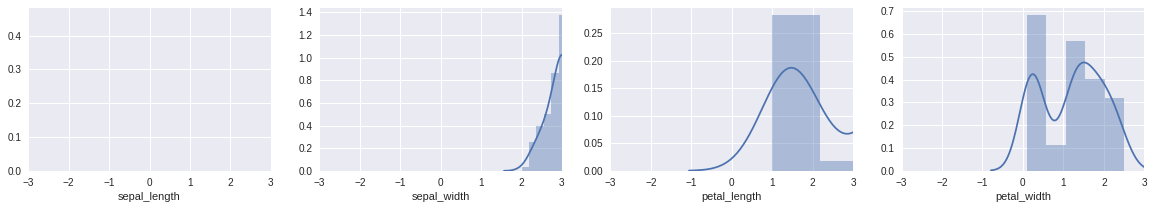

In [50]:
#Distribution plots, create subplots:
fig = plt.figure(figsize=(20,3))
for i, col in enumerate(names):
    fig.add_subplot(1,4, 1+i)
    sns.distplot(iris_df[col])
    plt.xlim(-3,3)

In [51]:
#Scale iris_df. 
from sklearn.preprocessing import StandardScaler

In [52]:
#scale, fit_transform, and then convert it to pd.DataFrame. 
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_scaled_df = pd.DataFrame(iris_scaled, columns=names)
iris_scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


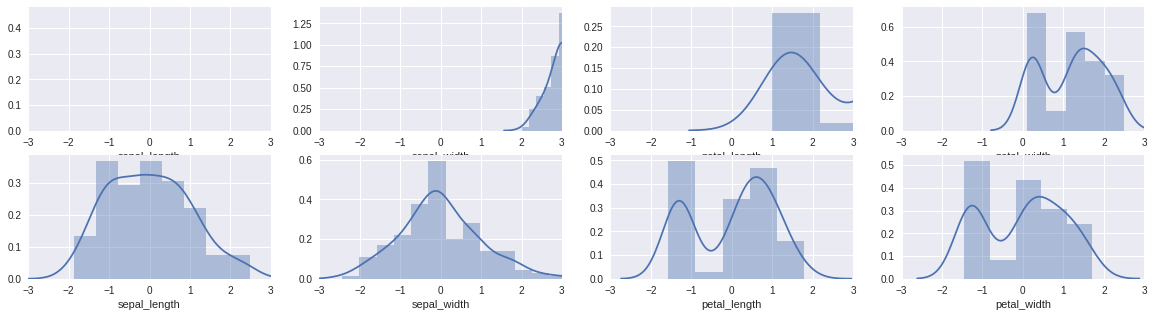

In [53]:
#Regraph distribution plots with scaled data.
fig = plt.figure(figsize=(20,5))
for i, col in enumerate(names):
    fig.add_subplot(2,4,1+i)
    sns.distplot(iris_df[col])
    plt.xlim(-3,3)
    fig.add_subplot(2,4,5+i)
    sns.distplot(iris_scaled_df[col])
    plt.xlim(-3,3)

In [54]:
from itertools import combinations
list(combinations(names,2))

[('sepal_length', 'sepal_width'),
 ('sepal_length', 'petal_length'),
 ('sepal_length', 'petal_width'),
 ('sepal_width', 'petal_length'),
 ('sepal_width', 'petal_width'),
 ('petal_length', 'petal_width')]

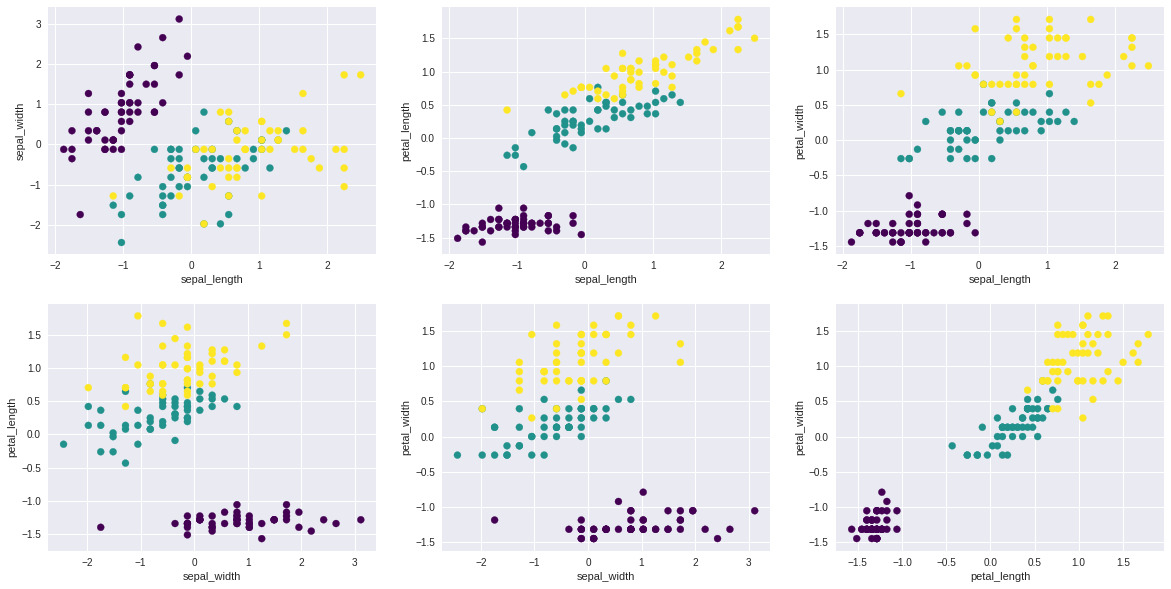

In [55]:
#Now we want to plot iris.target: setosa, versicolor, virginica. Also need to get all the combinations of graphs out. 
import matplotlib.cm as cm
fig = plt.figure(figsize=(20,10))
for i, pair in enumerate(combinations(names,2)):
    name_1 = pair[0]
    name_2 = pair[1]
    feat_1 = iris_scaled_df[name_1]
    feat_2 = iris_scaled_df[name_2]
    fig.add_subplot(2,3,1+i)
    plt.scatter(feat_1, feat_2, c=IRIS.target, cmap=cm.viridis)
    plt.xlabel(name_1)
    plt.ylabel(name_2)

In [56]:
#calculate pca so you can see it in different dimensions.
from sklearn.decomposition import PCA
pca = PCA()
iris_pca = pca.fit_transform(iris_scaled_df)
iris_pca_df = pd.DataFrame(iris_pca, columns = ("PC1", "PC2", "PC3", "PC4"))
iris_pca_df.head()

,PC1,PC2,PC3,PC4
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


In [57]:
PC_names = ["PC1", "PC2", "PC3", "PC4"]
display(PC_names)
display(names)

['PC1', 'PC2', 'PC3', 'PC4']

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [58]:
list(combinations(PC_names,2))

[('PC1', 'PC2'),
 ('PC1', 'PC3'),
 ('PC1', 'PC4'),
 ('PC2', 'PC3'),
 ('PC2', 'PC4'),
 ('PC3', 'PC4')]

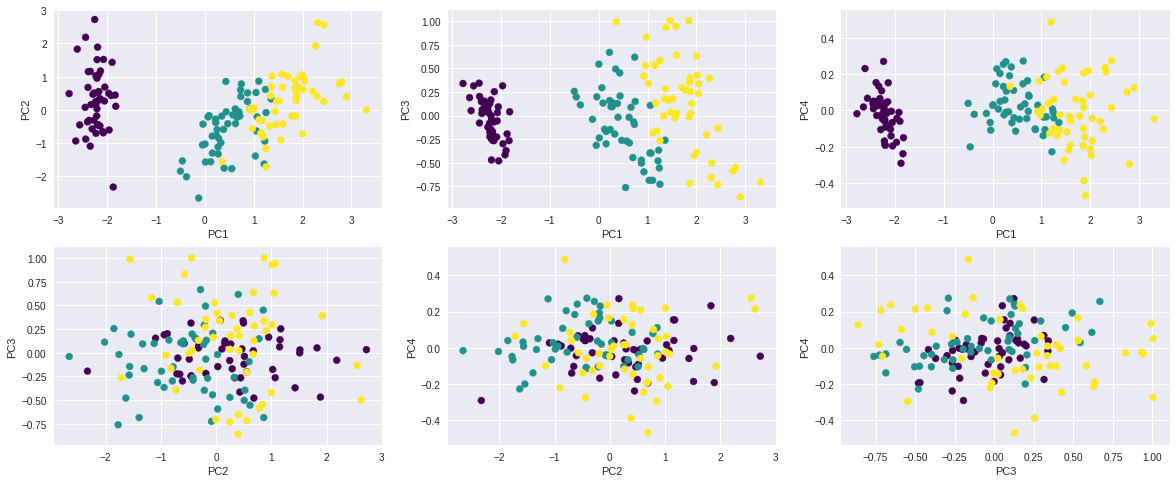

In [59]:
#plot pca scatter
fig = plt.figure(figsize=(20,8))
for i, pair in enumerate(combinations(PC_names,2)):
    pca_1 = pair[0]
    pca_2 = pair[1]
    pair_1 = iris_pca_df[pca_1]
    pair_2 = iris_pca_df[pca_2]
    fig.add_subplot(2,3,1+i)
    plt.scatter(pair_1, pair_2, c=IRIS.target, cmap = cm.viridis)
    plt.xlabel(pca_1)
    plt.ylabel(pca_2)